# Project Final Report: Predicting Newsletter Subscription in MineCraft Server

**Ray Cho, Sienna Juco, Alina Lin, Suri Lui**

## Introduction

As the digital entertainment industry continues to grow, video games have become an important part of many people's lives. Understanding players' behaviours is valuable for gaming companies, as it can help them analyze factors influencing newsletter subscriptions, improving engagement strategies and optimizing recruitment efforts. This prompts us to the question: **Can the combination of a player's experience level, total played hours, and age predict whether they subscribe to newsletters**? 

Minecraft, a sandbox game developed and published in 2011, has gained worldwide popularity among players of all ages. In the game, players can explore, build structures, and interact with a procedurally generated world made of blocks(Minecraft, 2025). Since Minecraft features open-ended gameplay with no fixed objectives, it is an ideal platform for studying player behaviour and engagement patterns. 

A research group in the Computer Science department at the University of British Columbia, led by Frank Wood, has collected data on how people play video games using a Minecraft server. Players' actions are recorded as they navigate the game, forming a dataset that tracks user engagement and personal attributes. This dataset is used to analyze player behavior and compare characteristics between those who subscribe to the newsletter and those who do not.

The data set contains 7 columns and 196 observations:

| Column Name |Data Type | Description|Possible Value/Range| 
|-----------|-------|-------------|-------------|
|  experience| character |Indicates the player’s experience familiarity with the fame |Beginner, Veteran, Regular,Amateur,Pro |
| subscribe |Logical value| player’s subscription status to the game |TRUE, FALSE  |
|hashedEmail  |character |Player’s email(hashed for privacy)|N/A |
|play_hours |numeric |Total hours the players has spent playing in the game |N/A |
|name |character|player’s name |N/A|
|gender|character | Player’s gender|Agender,Male, Female, Non-binary, Two-spirited, Prefer not to Say, Other |
|age| numeric | Player’s Age | N/A|


_This project focuses on developing a k-nearest neighbors (KNN) learning model to predict whether a player will subscribe to a newsletter based on their personal information and playing habits. The optimal k value will be determined through forward selection to achieve the highest prediction accuracy._

## Method and Results

In order to answer the initial question of interest, the K-Nearest Neighnors (KNN) classification model was used. KNN was an optimal choice for analyzing this question since it does not assume linear relationships between variables, and it classifies new observations based on a majority class. Before this model was applied, the data was preprocessed. Meaning the players.csv data was prepared by selecting the relevant columns (experience, Age, played_hours, and subscribe), converting categorical predictors into factors (and thus, becoming numeric predictors), as well as imputing missing age values with the mean. Then, the data was split into training and testing sets (80-20), and a recipe was created to standardize the numeric variable. This step was imperative as KNN assumes the dataset consists of a comparable scale; if it is not—meaning one variable has a larger or greater range of values than the other— it could influence the model's predictions. Furthermore, the KNN classification model was created with the number of neighbors as a tunable parameter. Using 5-fold cross-validation, the model was then trained and evaluated over a range of k values (from 1-30), and the results were filtered to focus on accuracy as a performance metric…[talk about rest of code + visualizations] 


### Loading Relevant Libraries

In [25]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows


In [26]:
url_players<-"https://raw.githubusercontent.com/Alina065/Individual-Planning-Process/refs/heads/main/players-3.csv"
data<-read_csv(url_players)

# View the first few rows to confirm the data loaded correctly
head(data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### Wrangling Data

In [28]:
players <- data |> 
    select(experience, played_hours, Age, subscribe) |>
    mutate(experience=as_factor(experience), subscribe=as_factor(subscribe)) |>
    mutate(Age = if_else(is.na(Age), mean(Age, na.rm = TRUE), Age))
players

experience,played_hours,Age,subscribe
<fct>,<dbl>,<dbl>,<fct>
Pro,30.3,9,TRUE
Veteran,3.8,17,TRUE
Veteran,0.0,17,FALSE
⋮,⋮,⋮,⋮
Amateur,0.0,17.00000,FALSE
Amateur,2.3,17.00000,FALSE
Pro,0.2,20.52062,TRUE


>The first part of conducting our data analysis for this project, to answer the initial question of interest, was to read in the dataset; this was done by the read_csv() function. Then, the dataset was cleaned and wrangled. To complete this, the players.csv data was prepared by choosing the relevant columns (experience, Age, played_hours, and subscribe) that were imperative to answer the inquiry. Furthermore, categorical predictors were converted into factors, which allowed them to become numeric predictors. This was essential since the KNN model requires numerical inputs to calculate distances between observations accurately. Additionally, imputing missing age values were replaced with the mean value, this was done to eliminate any NA values in the dataset—a problem that would otherwise cause KNN to not function properly. This step also helps in maintaining the overall distribution of the data. 


### Splitting the Data

In [29]:
set.seed(123)

player_split <- initial_split(players, prop = 0.8)
player_training <- training(player_split)
player_testing  <- testing(player_split)

>The next part of the data analysis was to split the data in the training and testing set. Whereas the training set is utilized to build the classifier and the testing set is used to test the validity of the classifier. In splitting the dataset, 80% of it was used for the classifier, while 20% of it was used as a test set. This was done in order to maximize the amount of data used to build the classifier, but also account for an adequate amount of data to test the model's ability to make accurate predictions. Additionally, a recipe was created to standardize the numeric variables. This step was imperative as KNN assumes the dataset consists of a comparable scale; if it is not—meaning one variable has a larger or greater range of values than the other— it could influence the model's predictions. So, by standardizing the data no one predictor would influence the calculations over others. Moreover, set seed was used to fix the randomness in splitting the data; therefore, each time the code is run, the training and testing sets would be the same, thus ensuring reproducibility in the data analysis.


### Model Building

In [20]:
player_recipe <- recipe(subscribe ~ ., data = player_training) |>
    step_scale(played_hours, Age) |>
    step_center(played_hours, Age)


In [30]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

In [31]:
player_vflod = vfold_cv(player_training, v = 5, strata = subscribe)

In [33]:
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_results <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = player_vflod, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
knn_results    

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.64000,5,0.01729794,Preprocessor1_Model01
2,accuracy,binary,0.64000,5,0.02223806,Preprocessor1_Model02
3,accuracy,binary,0.63875,5,0.04114570,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,binary,0.7245833,5,0.003572173,Preprocessor1_Model28
29,accuracy,binary,0.7245833,5,0.003572173,Preprocessor1_Model29
30,accuracy,binary,0.7245833,5,0.003572173,Preprocessor1_Model30


>The next step of data analysis was to build the classifier. In order to do this, the nearest_neighbor function was used, and cross-validation was done by using tune(). Cross-validation is vital to this data analysis as it determines the optimal K value to use. Using 5-fold cross-validation, the model was then trained and evaluated over a range of K values from 1-30. The K value was then chosen based on the one that produced the highest classification accuracy during cross-validation. It was concluded that the optimal K value was 26. Selecting this value was important as too small K values could lead to overfitting and too large could lead to underfitting. By knowing this value, the training of the classification model took place on the training data.

### Evaluation of Model

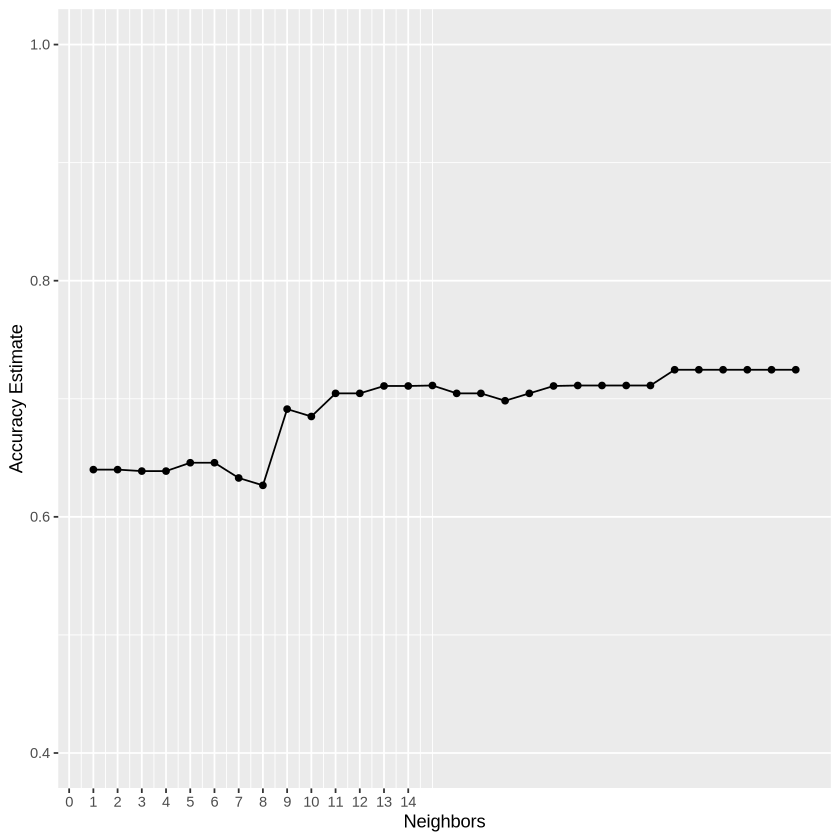

In [35]:
accuracies <- knn_results |> 
      filter(.metric=="accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k

>**Figure 1: Model Accuracy at Varying k Values**
>
>A visualization was then created to generate a line plot (with points) that visualizes the accuracy of the KNN classifier with different values of K (number of neighbors). To begin with, the dataset was filtered to only include rows where the performance metric is accuracy. The graph plotted shows the average accuracy for each K value, demonstrating that accuracy is generally improving as K increases. The best accuracy is seen when k is between 19 and 28. After that, the accuracy starts to drop slightly. This suggests that using a moderate k value leads to better model performance, likely because it helps reduce noise while keeping the important patterns in the data without making the decision boundary too smooth.

#### Determining the Best K Value

In [47]:
knn_results |> slice_max(mean)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
25,accuracy,binary,0.7245833,5,0.003572173,Preprocessor1_Model25
26,accuracy,binary,0.7245833,5,0.003572173,Preprocessor1_Model26
27,accuracy,binary,0.7245833,5,0.003572173,Preprocessor1_Model27
28,accuracy,binary,0.7245833,5,0.003572173,Preprocessor1_Model28
29,accuracy,binary,0.7245833,5,0.003572173,Preprocessor1_Model29
30,accuracy,binary,0.7245833,5,0.003572173,Preprocessor1_Model30


>By slicing the maximum in the knn_results dataset, the best k value with the most accuracy is 25.

### Using the Model in the Testing set

In [48]:
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 25) |>
    set_engine("kknn") |>
    set_mode("classification")

player_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(player_spec) |>
    fit(data = player_training)

In [49]:
players_predictions <- predict(player_fit, player_testing) |>
    bind_cols(player_testing)

players_metrics <- players_predictions |> 
    metrics(truth = subscribe, estimate = .pred_class)

players_conf_mat <- players_predictions |> 
    conf_mat(truth = subscribe, estimate = .pred_class)

players_predictions

.pred_class,experience,played_hours,Age,subscribe
<fct>,<fct>,<dbl>,<dbl>,<fct>
TRUE,Veteran,3.8,17,TRUE
TRUE,Veteran,0.0,22,TRUE
TRUE,Veteran,0.0,17,TRUE
⋮,⋮,⋮,⋮,⋮
TRUE,Veteran,0,20,TRUE
TRUE,Regular,0,50,FALSE
TRUE,Pro,0,17,FALSE


>From the dataset above, the predictions whos serveral cases where the model predicted TRUE when the actual value was FALSE. 

In [50]:
players_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.75000000
kap,binary,-0.04712042


In [51]:
players_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE     0    1
     TRUE      9   30

## Discussion

This analysis explored whether a player's experience level, total play hours, and age had a high probability of predicting subscriptions to newsletters. K-Nearest Neighbors model was applied to the players.csv data to determine if particular variables could indicate a player's likelihood to subscribe. Chosen due to its simple and intuitive algorithm, KNN was used in cross-validation to select and determine the model's optimal number of neighbors (k=26). The final model achieved **an accuracy of 75%**, indicating a **moderate** ability to predict subscriptions based on players' experience, total play hours, and age, as suspected. This accuracy could have been a result of several different factors. For example, not all players in the dataset followed predictable patterns when subscribing to newsletters, meaning that some may have subscribed due to promotions, friends, or random interest, factors that are not necessarily related to the variables chosen. This randomness prevents KNN from producing accurate predictions, thus lowering the model's accuracy. Furthermore, the confusion matrix produced by the data provided compelling insights. The model correctly predicted 30 true positives, meaning it successfully identified 30 real subscribers. This statistic gives rise to a 100% calculated recall (using the recall formula with the confusion matrix), suggesting that the model does not miss any actual subscribers–it identifies all of them. Yet, the model produces 9 false positives; therefore, it incorrectly classified 9 players as subscribers when they were not. Interestingly, the model had 0 false negatives, meaning it did not misidentify any actual subscribers, and only had 1 true negative, or 1 non-subscriber. Using this data, **a precision of ~77%** was calculated (through a precision formula with the confusion matrix), signifying that 23% of players who were predicted to be subscribers were not. This implies that the model is highly biased towards predicting subscriptions, which could raise questions about the dataset. For instance, if the training data contains more subscribers than non-subscribers, the model may be predisposed to predicting “true” leading to an overestimation of subscriptions.
    
Although the model was not completely accurate, it could have practical implications. As stated previously, the model is around 75% accurate, suggesting that the variables–experience level, total play hours, and age— do provide some predictive influence on subscription behavior, which could be valuable for a number of different reasons. In particular, this information could be useful for marketing teams wanting to expand outreach to identify groups that are likely to subscribe to newsletters, perhaps those within a certain age group or a certain experience level. By using this data, they can develop more targeted marketing strategies and methods to boost player subscription levels. Additionally, this information could also help the game developers tailor content more suitable to its users. For example, if a lot of those subscribing are veteran users, then the content in the game could be more advanced; in contrast, if a majority of players subscribing are beginners, the game could be tailored to be more accessible. 
    
The results from this analysis also lead to further questions, such as if the selected variables are sufficient to predict subscription behavior or if other variables would be more suitable—like in-game purchases, weekly game play, amount of friends—which could provide more accurate predictions. Additionally, in the future one could conduct even more data analysis to determine a concrete relationship to ensure that this result is common amongst the entire population of gamers and not just the subset that participated in this particular study. Overall, this KNN model provides a foundation for understanding subscription likelihood, although analysis of additional variables and expansion of the dataset could be completed to create a more reliable prediction model.

## Reference

Wikimedia Foundation. (2025b, April 3). Minecraft. Wikipedia. 
    https://en.wikipedia.org/wiki/Minecraft 